In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import umap

In [2]:
digits=load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
#dataset

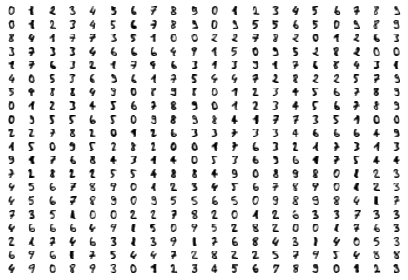

In [4]:
fig,array=plt.subplots(20,20)
axes=array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

In [5]:
digits_df=pd.DataFrame(digits.data[:,1:11])

In [6]:
digits_df['digit']=pd.Series(digits.target).map(lambda x:"Digit{}".format(x))

In [7]:
digits_df

0     1     2     3     4    5    6    7    8     9   digit
0     0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  13.0  Digit0
1     0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0   0.0  Digit1
2     0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0   3.0  Digit2
3     0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  13.0  Digit3
4     0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0   0.0  Digit4
...   ...   ...   ...   ...   ...  ...  ...  ...  ...   ...     ...
1792  0.0   4.0  10.0  13.0   6.0  0.0  0.0  0.0  1.0  16.0  Digit9
1793  0.0   6.0  16.0  13.0  11.0  1.0  0.0  0.0  0.0  16.0  Digit0
1794  0.0   1.0  11.0  15.0   1.0  0.0  0.0  0.0  0.0  13.0  Digit8
1795  0.0   2.0  10.0   7.0   0.0  0.0  0.0  0.0  0.0  14.0  Digit9
1796  0.0  10.0  14.0   8.0   1.0  0.0  0.0  0.0  2.0  16.0  Digit8

[1797 rows x 11 columns]

C:\Users\rajat\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rajat\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rajat\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rajat\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rajat\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rajat\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

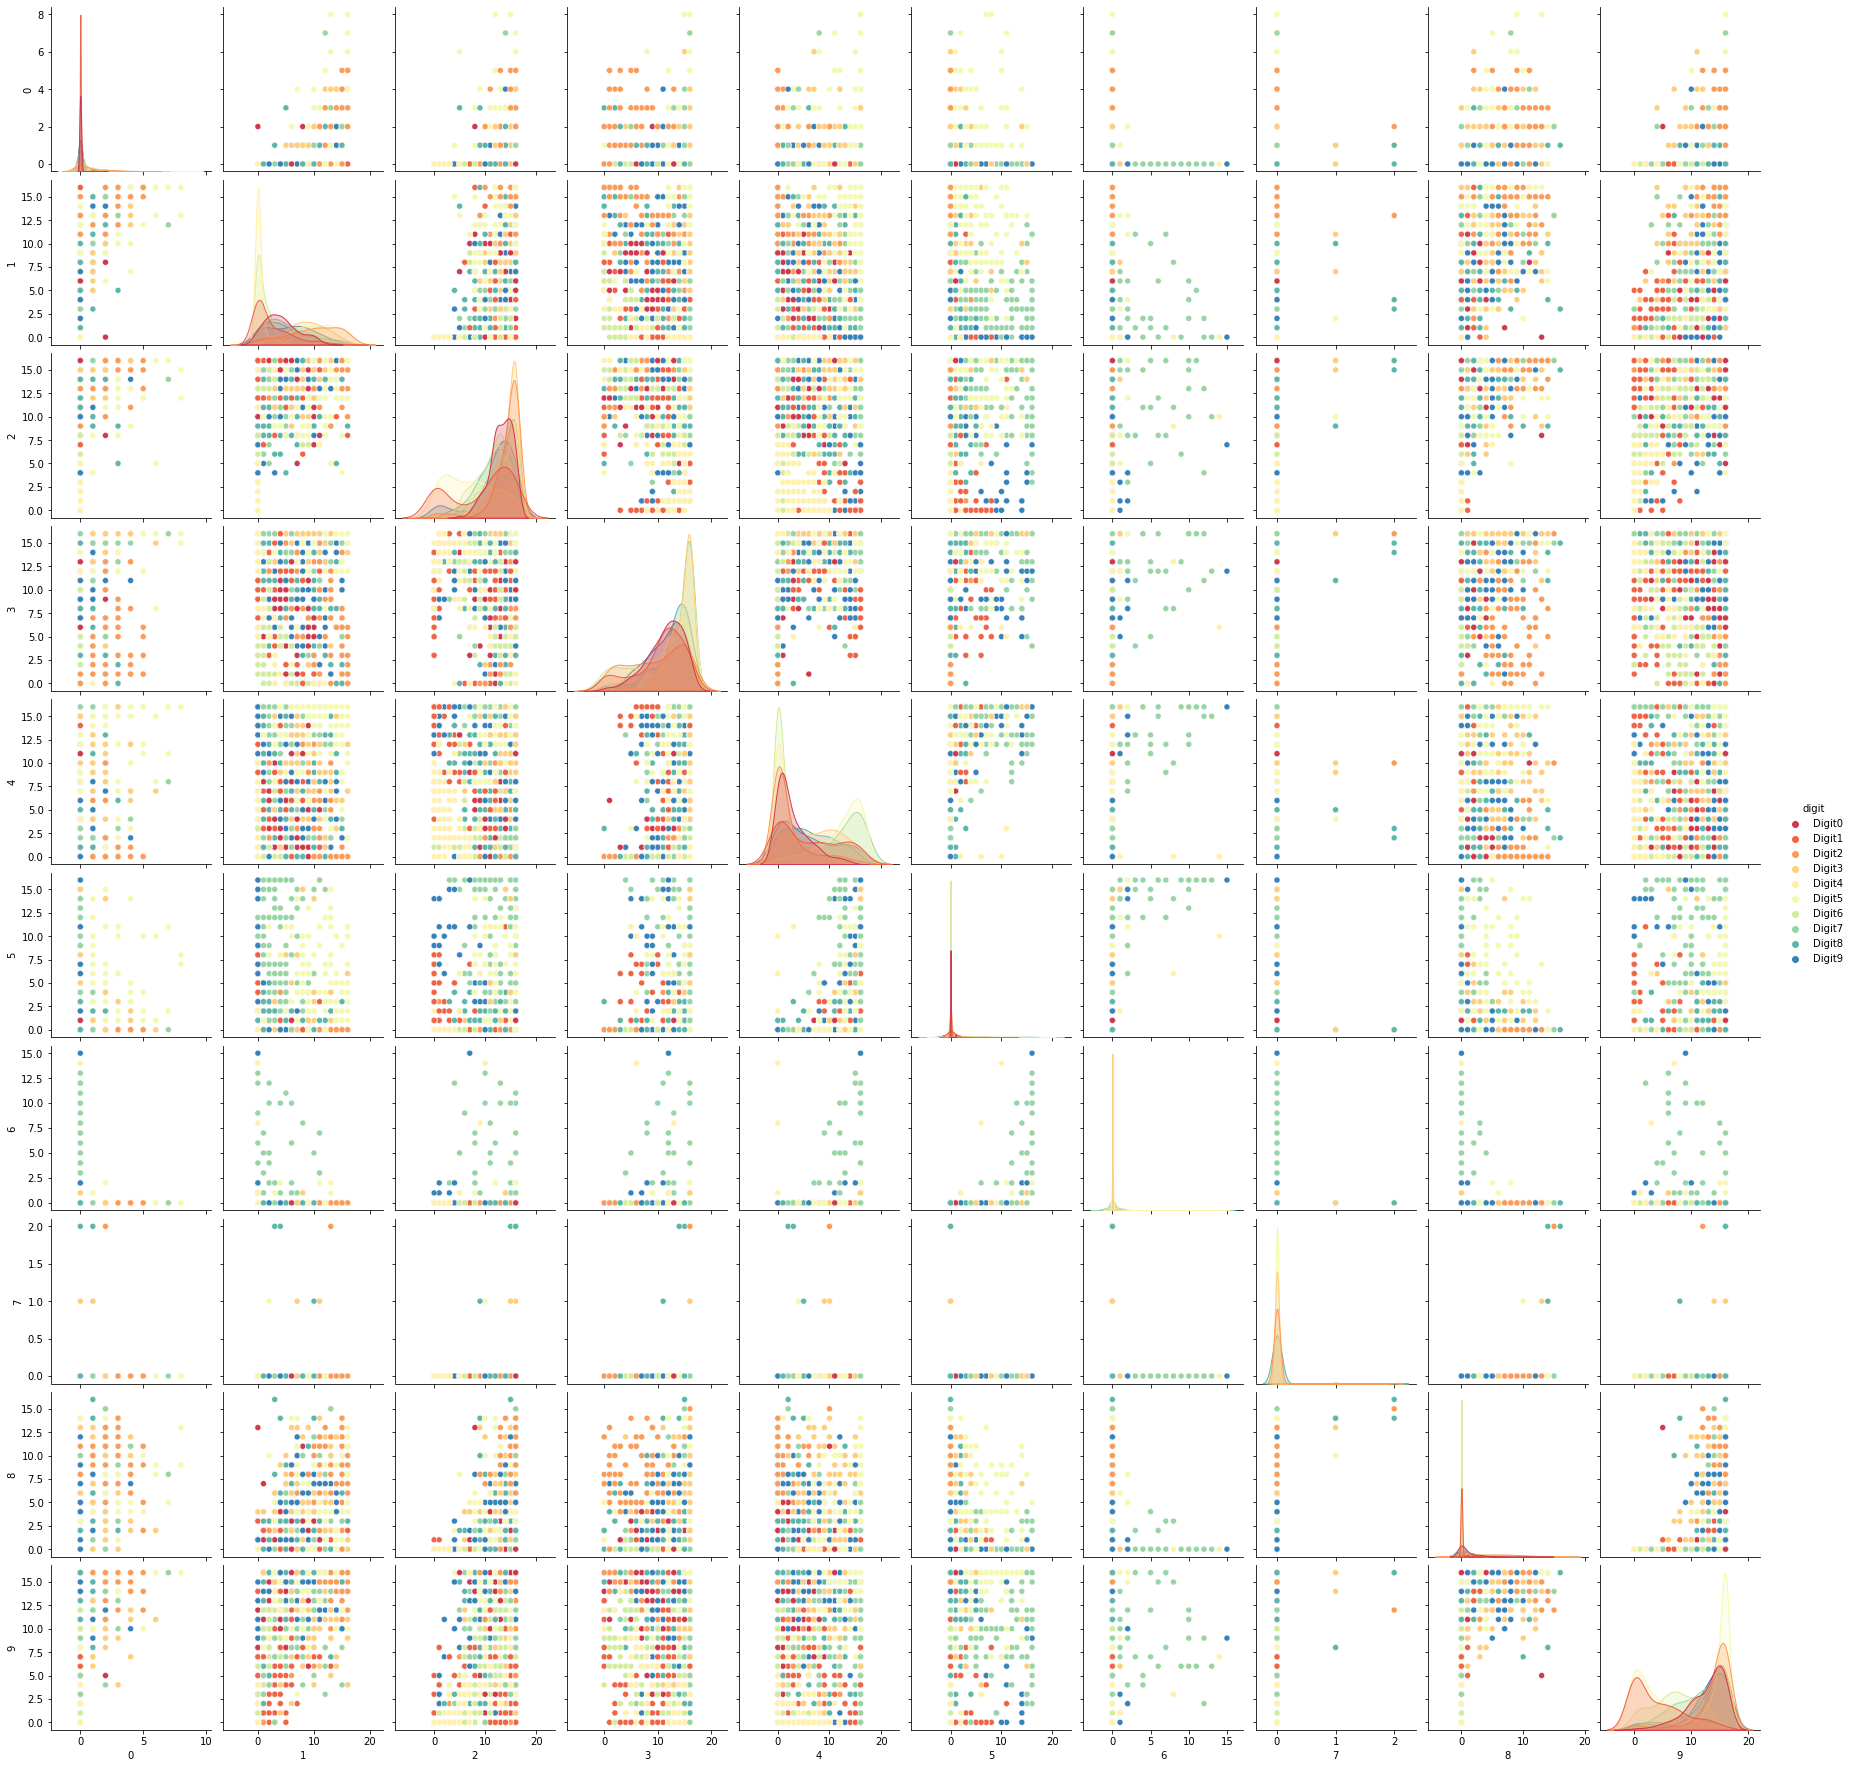

In [8]:
sns.pairplot(digits_df, hue='digit', palette='Spectral')

In [9]:
reduce=umap.UMAP(random_state=31)

In [10]:
reduce.fit(digits.data)

UMAP(random_state=31)

In [11]:
embadding=reduce.transform(digits.data)
assert(np.all(embadding==reduce.embedding_))

In [12]:
embadding.shape

(1797, 2)

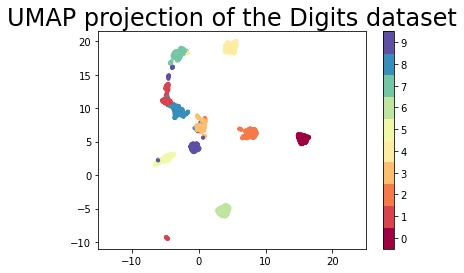

In [13]:
plt.scatter(embadding[:, 0], embadding[:, 1], c=digits.target, cmap='Spectral', s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

In [14]:
from io import BytesIO
from PIL import Image
import base64

In [15]:
def embeddable_image(data):
    img_data = 255 - 15 * data.astype(np.uint8)
    image = Image.fromarray(img_data, mode='L').resize((64, 64), Image.BICUBIC)
    buffer = BytesIO()
    image.save(buffer, format='png')
    for_encoding = buffer.getvalue()
    return 'data:image/png;base64,' + base64.b64encode(for_encoding).decode()

In [16]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral10

output_notebook()

Loading BokehJS ...

In [17]:
digits_df = pd.DataFrame(embadding, columns=('x', 'y'))
digits_df['digit'] = [str(x) for x in digits.target]
digits_df['image'] = list(map(embeddable_image, digits.images))

datasource = ColumnDataSource(digits_df)
color_mapping = CategoricalColorMapper(factors=[str(9 - x) for x in digits.target_names],
                                       palette=Spectral10)

plot_figure = figure(
    title='UMAP projection of the Digits dataset',
    plot_width=600,
    plot_height=600,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(tooltips="""
<div>
    <div>
        <img src='@image' style='float: left; margin: 5px 5px 5px 5px'/>
    </div>
    <div>
        <span style='font-size: 16px; color: #224499'>Digit:</span>
        <span style='font-size: 18px'>@digit</span>
    </div>
</div>
"""))

plot_figure.circle(
    'x',
    'y',
    source=datasource,
    color=dict(field='digit', transform=color_mapping),
    line_alpha=0.6,
    fill_alpha=0.6,
    size=4
)
show(plot_figure)

In [18]:
np.random.seed(22)
data = np.random.rand(800, 4)

In [19]:
data

array([[0.20846054, 0.48168106, 0.42053804, 0.859182  ],
       [0.17116155, 0.33886396, 0.27053283, 0.69104135],
       [0.22040452, 0.81195092, 0.01052687, 0.5612037 ],
       ...,
       [0.78116199, 0.76367529, 0.17859231, 0.83571951],
       [0.15921739, 0.58746603, 0.86781699, 0.08960381],
       [0.07006698, 0.07492569, 0.37785013, 0.8801282 ]])

In [20]:
fit = umap.UMAP()
%time u = fit.fit_transform(data)

Wall time: 7.32 s


Text(0.5, 1.0, 'UMAP embedding of random colours')

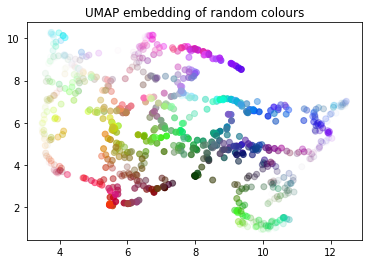

In [21]:
plt.scatter(u[:,0], u[:,1], c=data)
plt.title('UMAP embedding of random colours')

In [22]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=data)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=data)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=data, s=100)
    plt.title(title, fontsize=18)

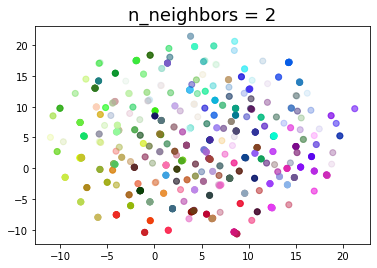

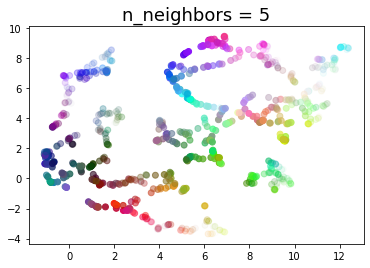

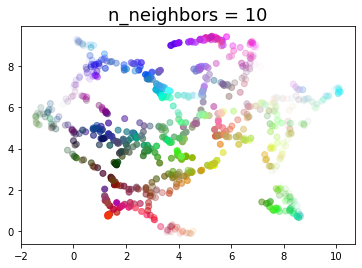

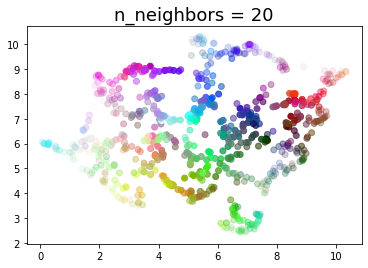

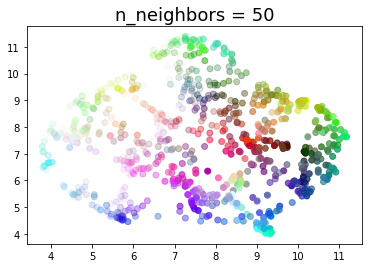

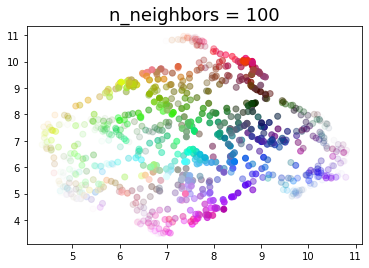

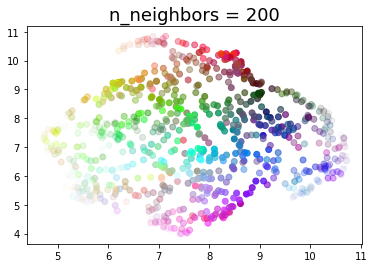

In [23]:
for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

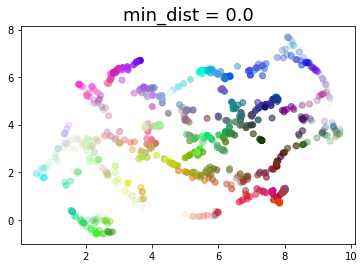

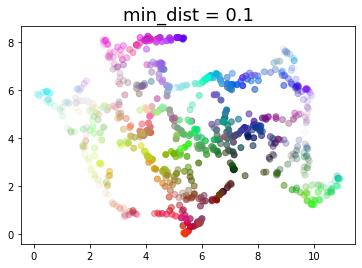

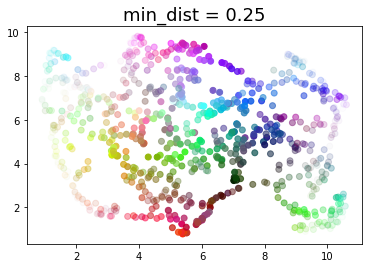

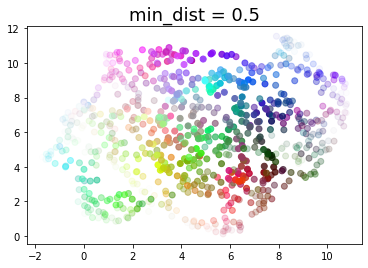

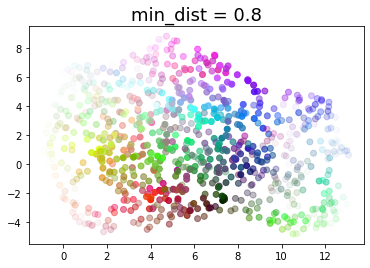

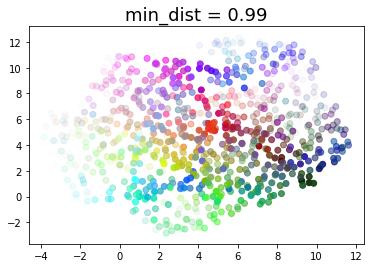

In [24]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    draw_umap(min_dist=d, title='min_dist = {}'.format(d))

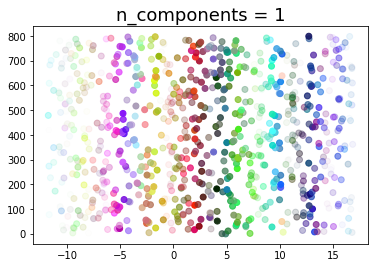

In [25]:
draw_umap(n_components=1, title='n_components = 1')

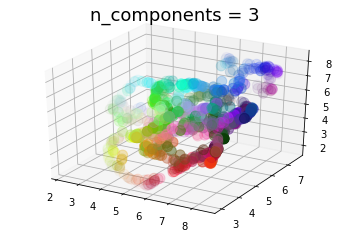

In [26]:
draw_umap(n_components=3, title='n_components = 3')

In [27]:
import umap.plot